<a href="https://colab.research.google.com/github/OdysseusPolymetis/chr2023/blob/main/2_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Natural Language Processing : tokenizing, lemmatizing, postagging and named entities**



You're free to use any lib that suits you better for your research. Here we're going to use `stanza` and `spacy`. Generally speaking, I would encourage the use of `stanza`, as in my field it generally got me the best results.

In [1]:
!pip install stanza

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 933.2/933.2 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 24.9 MB/s eta 0:00:00


##What's NLP and why do we need it ?
Generally speaking, loads of people use NLP as a preprocessing phase, for further textual treatment. And it is absolutely necessary if you want to avoid noise in statistical analysis and machine learning uses.
<br>Here, I'm going to show you what you get when you don't preprocess and when you do, with a basic example.

Let's say we want to create a word cloud, showing which terms are more important in a specific text.
<br>Here's a cloud produced right after just splitting the _Trois Mousquetaires_ and projecting the text in a word cloud, with no preprocessing.

![](https://drive.google.com/uc?export=view&id=1g8RLOXodDDGBgfR6tJ-jvVG1JHTdz65f)

This cloud is useless. Why ? because we don't need to see that the word "était" is important, we basically already know that without a word cloud. And what is more, we have several occurrences of the same basic word, "était", "fut", "est", etc.
<br>So let's **lemmatize**. Here's the word cloud we get.

![](https://drive.google.com/uc?export=view&id=10vv3sdsqLMBMXYW5-YAKp9ztgYq_sJDs)

A bit better, but not so good either. A lot of words are of no use as we already know they are very frequent and have no semantic weight.
<br>So, this time, we're going to remove **stopwords**, and punctuation.

![](https://drive.google.com/uc?export=view&id=1c9PxvrkXDTNZTC7QOGNCi2qOQ5_fI9th)

Now we get a more satisfying word cloud, that should give more information about the text we're working on.

##How do you do it ?

##**Some online useful tools**

###**UDPipe**
You'll find it [here](https://lindat.mff.cuni.cz/services/udpipe/).
<br>This tool is pretty useful if you want to get access to a preprocessed text quickly with no programming skills.

###**Deucalion**
You'll find it [here](https://dh.chartes.psl.eu/deucalion/api/fr/).
<br>This tool is useful for Latin, Greek and certain French types.

###**VoyantTools**
You'll find it [here](https://voyant-tools.org/).
<br>This is no NLP preprocessing tool, but once you've done a bit of preprocessing on your text, it is a useful tool to visualize your results.

#**TOKENIZING, LEMMATIZING, POSTAGGING**

Now let's try **`stanza`**.
<br> we'll use it on a small string variable, taken from the _Misérables_.

In [2]:
preface="Tant qu’il existera, par le fait des lois et des mœurs, une damnation sociale créant artificiellement, en pleine civilisation, des enfers, et compliquant d’une fatalité humaine la destinée qui est divine ; tant que les trois problèmes du siècle, la dégradation de l’homme par le prolétariat, la déchéance de la femme par la faim, l’atrophie de l’enfant par la nuit, ne seront pas résolus ; tant que, dans de certaines régions, l’asphyxie sociale sera possible ; en d’autres termes, et à un point de vue plus étendu encore, tant qu’il y aura sur la terre ignorance et misère, des livres de la nature de celui-ci pourront ne pas être inutiles."

You can also try the following code on the whole book, which is available with the `gdown` below.
<br>Execute the three following cells only if you want to try nlp on the full text.

In [ ]:
!gdown --id 1GEgd5cQoJkTm5PRWfixxOKHe3uOlxFqo

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1GEgd5cQoJkTm5PRWfixxOKHe3uOlxFqo
To: /content/miserables.txt
100% 3.17M/3.17M [00:00<00:00, 213MB/s]


In [ ]:
filepath_of_text = "/content/miserables.txt"

In [ ]:
full_text = open(filepath_of_text, encoding="utf-8").read()

##**stanza**

I generally use `stanza` for three reasons :
<br>- there is a very large number of languages it can be applied to (which you can check [here](https://stanfordnlp.github.io/stanza/performance.html)),
<br>- it's pretty quick, and performs well on large corpora,
<br>- it's easy to manipulate.

Later on, we'll also try different kinds of models, based on BERT models and other contextual models, but that needs to be a bit more advanced in programming.

To download a specific language model in `stanza`, you'll need the code letters corresponding to each models, which you can get [here](https://stanfordnlp.github.io/stanza/performance.html).
<br>Let's begin with a French model.

In [1]:
import stanza
stanza.download('fr')

INFO:stanza:Downloading default packages for language: fr (French) ...
INFO:stanza:File exists: /root/stanza_resources/fr/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources.


Loads of models have several pipelines which you may not want to execute all the time as it can slow down the process (eg, here we won't, for the time being, be using the NER process, so we don't need to call it). You can specify the processes needed this way :

In [4]:
nlp_stanza = stanza.Pipeline(lang='fr', processors='tokenize,mwt,pos,lemma')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


Now we can analyze the `preface` variable. It will give us a list of sentences with values attached to one specific token.

In [5]:
miserables_stanza=nlp_stanza(preface)

Let's go through each sentence and check the results on each word.

In [6]:
for sent in miserables_stanza.sentences:
  for token in sent.words:
    print(token.text + ' - ' + token.lemma + ' - ' + token.pos)

Tant - tant - ADV
qu’ - que - SCONJ
il - lui - PRON
existera - exister - VERB
, - , - PUNCT
par - par - ADP
le - le - DET
fait - fait - NOUN
de - de - ADP
les - le - DET
lois - loi - NOUN
et - et - CCONJ
des - un - DET
mœurs - mœur - NOUN
, - , - PUNCT
une - un - DET
damnation - damnation - NOUN
sociale - social - ADJ
créant - créer - VERB
artificiellement - artificiellement - ADV
, - , - PUNCT
en - en - ADP
pleine - plein - ADJ
civilisation - civilisation - NOUN
, - , - PUNCT
des - un - DET
enfers - enfer - NOUN
, - , - PUNCT
et - et - CCONJ
compliquant - compliquer - VERB
d’ - de - ADP
une - un - DET
fatalité - fatalité - NOUN
humaine - humain - ADJ
la - le - DET
destinée - destiner - NOUN
qui - qui - PRON
est - être - AUX
divine - divin - ADJ
; - ; - PUNCT
tant - tant - ADV
que - que - SCONJ
les - le - DET
trois - trois - NUM
problèmes - problème - NOUN
de - de - ADP
le - le - DET
siècle - siècle - NOUN
, - , - PUNCT
la - le - DET
dégradation - dégradation - NOUN
de - de - ADP
l’ - 

Not so bad.

# **NER : NAMED ENTITY RECOGNITION**

**Named entities** are elements that can be culturally idenfiable. They are not necessarily one unique word. For example, "Rome" is a named entity, but a NER tool could also associate it with the expression "the city of seven hills".

Let's try with **`stanza`** and redefine the Pipeline, using the `ner` process.



In [7]:
stanza_ner = stanza.Pipeline(lang='fr', processors='tokenize,ner')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | wikiner  |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Let's take a random slice of the _Misérables_.

In [8]:
doc = stanza_ner("qui avaient couru sur son compte au moment où il était arrivé dans le diocèse. Vrai ou faux, ce qu'on dit des hommes tient souvent autant de place dans leur vie et surtout dans leur destinée que ce qu'ils font. M. Myriel était fils d'un conseiller au parlement d'Aix ; noblesse de robe.")

In [9]:
print(*[f'entity: {ent.text}\ttype: {ent.type}' for ent in doc.ents], sep='\n')

entity: Myriel	type: PER
entity: Aix	type: LOC


If you want to check on the whole book, you'll need to have the previous variable `full_text` executed beforehand.

In [ ]:
ents_stanza = stanza_ner(full_text)

In [ ]:
print(*[f'entity: {ent.text}\ttype: {ent.type}' for ent in ents_stanza.ents], sep='\n')

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
entity: Liberté_	type: LOC
entity: faubourg Saint-Antoine	type: LOC
entity: faubourg Saint-Antoine	type: LOC
entity: Le coup qu'elle frappe	type: MISC
entity: Cette	type: LOC
entity: faubourg Saint-Antoine	type: LOC
entity: Paris	type: LOC
entity: Antoine_	type: PER
entity: faubourg Antoine	type: LOC
entity: Mont Aventin	type: LOC
entity: Ennius	type: PER
entity: faubourg Saint-Antoine	type: LOC
entity: Cette	type: LOC
entity: Saint-Antoine	type: PER
entity: Paris	type: LOC
entity: Moyen-Âge	type: LOC
entity: Aucune	type: LOC
entity: Dieu	type: PER
entity: Chapitre VI	type: MISC
entity: Enjolras	type: PER
entity: Enjolras	type: PER
entity: café Musain	type: LOC
entity: Enjolras	type: PER
entity: Si	type: MISC
entity: Ceux	type: LOC
entity: Cette	type: LOC
entity: Courfeyrac	type: LOC
entity: Feuilly	type: LOC
entity: la Glacière	type: LOC
entity: Combeferre	type: PER
entity: Picpus	type: LOC
entity: Bahorel	t

Now let's try some basic visualizations on preprocessed data.

First, let's perform it on the whole text. I'll reprint the three optional cells used before just below. This part should take some time as the text is pretty long.



In [10]:
!gdown --id 1GEgd5cQoJkTm5PRWfixxOKHe3uOlxFqo

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1GEgd5cQoJkTm5PRWfixxOKHe3uOlxFqo
To: /content/miserables.txt
100% 3.17M/3.17M [00:00<00:00, 226MB/s]


In [2]:
filepath_of_text = "/content/miserables.txt"

In [3]:
full_text = open(filepath_of_text, encoding="utf-8").read()

In [4]:
nlp_stanza = stanza.Pipeline(lang='fr', processors='tokenize,mwt,pos,lemma')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


And there comes the longest part :
<br>(Careful, this parts takes a lot of cuda, if you're out of cuda (CUDA out of memory), you need to reload the virtual environment in "Tools" and re-execute some of the variable instances)

As your cuda may be too low, we might need to use text batching to aleviate its use. You can modify the number of sentences taken into account by changing the variable `batch_size`.
<br>For this part, we only want lemmas, and the following function will allow us to get them all, without cuda memory problems.

In [54]:
def batch_process(text, nlp, batch_size=50):
    paragraphs = text.split('\n\n')
    batches = [paragraphs[i:i + batch_size] for i in range(0, len(paragraphs), batch_size)]

    all_lemmas = []

    for batch in batches:
        batch_text = '\n\n'.join(batch)
        doc = nlp(batch_text)
        for sentence in doc.sentences:
            for word in sentence.words:
                if word.lemma is not None:
                    all_lemmas.append(word.lemma)

    return all_lemmas

This part takes roughly 5 minutes for the _Misérables_

In [55]:
lemmas=batch_process(full_text, nlp_stanza)

And let's check what's inside.

In [56]:
print(lemmas[0:20])

['Victor', 'Hugo', 'le', 'misqrable', 'livre', 'premier', '--', 'un', 'juste', 'chapitre', 'I', 'monsieur', 'Myriel', 'en', '1815', ',', 'monsieur', 'Charles-François-Bienvenu', 'Myriel', 'être']


And now let's use some basic `nltk` features, such as the concordance tables (and let's download the stopwords).

In [48]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopset = set(stopwords.words('french'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The nltk stopwords list being very small, I'll add some more words.

In [91]:
!gdown 15XszQYD6Ld_eKLPidzETcTQX9-H053xV

Downloading...
From: https://drive.google.com/uc?id=15XszQYD6Ld_eKLPidzETcTQX9-H053xV
To: /content/stopwords.txt
100% 4.59k/4.59k [00:00<00:00, 21.4MB/s]


In [92]:
extra_stop = open("/content/stopwords.txt", encoding="utf-8").read().split("\n")

In [93]:
stopset.update(extra_stop)

In [57]:
for lemma in lemmas:
    if not isinstance(lemma, str):
        print(f"Type non string trouvé : {lemma} (type : {type(lemma)})")

In [58]:
hugo_text = nltk.Text(lemmas)

In [59]:
hugo_text.concordance("Valjean")

Displaying 25 of 1107 matches:
re son nom ? vous vous appeler Jean Valjean . maintenant vouloir vous que moi v
t : -- voici . moi moi appeler Jean Valjean . moi être un galérien . moi avoir 
oir mettre sur le passeport: « Jean Valjean , forçat libérer , natif de ... -- 
 avoir ajouter : « -- monsieur Jean Valjean , ce être à Pontarlier que vous all
ntarlier , où vous aller , monsieur Valjean , un industrie toute patriarcal et 
que ce homme , qui soi appeler Jean Valjean , ne avoir que trop son misère prés
 , et lui avoir souper avec ce Jean Valjean de le même air et de le même façon 
 le petit maison . chapitre VI Jean Valjean vers le milieu de le nuit , Jean Va
an vers le milieu de le nuit , Jean Valjean soi réveiller . Jean Valjean être d
, Jean Valjean soi réveiller . Jean Valjean être de un pauvre famille de paysan
Mathieu ; son père soi appeler Jean Valjean , ou Vlajean , sobriquet probableme
 contraction de _voilà Jean_ . Jean Valjean être de un caractère pensif sans êt
en appare

You can also, for example, find which couples of words are most predominant in the whole text, using `BigramCollocationFinder`.

In [51]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

In [62]:
bcf = BigramCollocationFinder.from_words(lemmas)
filter_stops = lambda w: len(w) < 3 or w in stopset
bcf.apply_word_filter(filter_stops)
bcf.nbest(BigramAssocMeasures.likelihood_ratio, 30)

[('Jean', 'Valjean'),
 ('quelque', 'chose'),
 ('monsieur', 'Madeleine'),
 ('monsieur', 'Gillenormand'),
 ('monsieur', 'Leblanc'),
 ('jeune', 'fille'),
 ('sans', 'doute'),
 ('mille', 'franc'),
 ('plus', 'tard'),
 ('tourner', 'vers'),
 ('garde', 'national'),
 ('rue', 'Plumet'),
 ('madame', 'Magloire'),
 ('savoir', 'quel'),
 ('genre', 'humain'),
 ('cents', 'franc'),
 ('jeune', 'homme'),
 ('monsieur', 'Mabeuf'),
 ('avocat', 'général'),
 ('bon', 'Dieu'),
 ('peu', 'près'),
 ('soeur', 'Simplice'),
 ('jeune', 'gens'),
 ('Louis', 'XVIII'),
 ('sans', 'cesse'),
 ('diriger', 'vers'),
 ('porte', 'cochère'),
 ('regarder', 'fixement'),
 ('cent', 'mille'),
 ('monsieur', 'Fauchelevent')]

Now let's use a very common tool for visualizing table results, `matplotlib`.

In [32]:
import matplotlib.pyplot as plt

And let's make a scatter plot on specific terms.

In [66]:
def plot_word_dispersion(text, words):
    word_positions = {word: [] for word in words}

    for index, word in enumerate(text):
        if word in word_positions:
            word_positions[word].append(index)

    plt.figure(figsize=(10, 6))
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']
    for i, (word, positions) in enumerate(word_positions.items()):
        plt.plot(positions, [i] * len(positions), 'o', label=word, color=colors[i % len(colors)])

    plt.yticks(range(len(words)), words)
    plt.ylim(-1, len(words))
    plt.title("Graphique de Dispersion des Mots")
    plt.xlabel("Position dans le texte")
    plt.ylabel("Mots")

    plt.legend()
    plt.show()

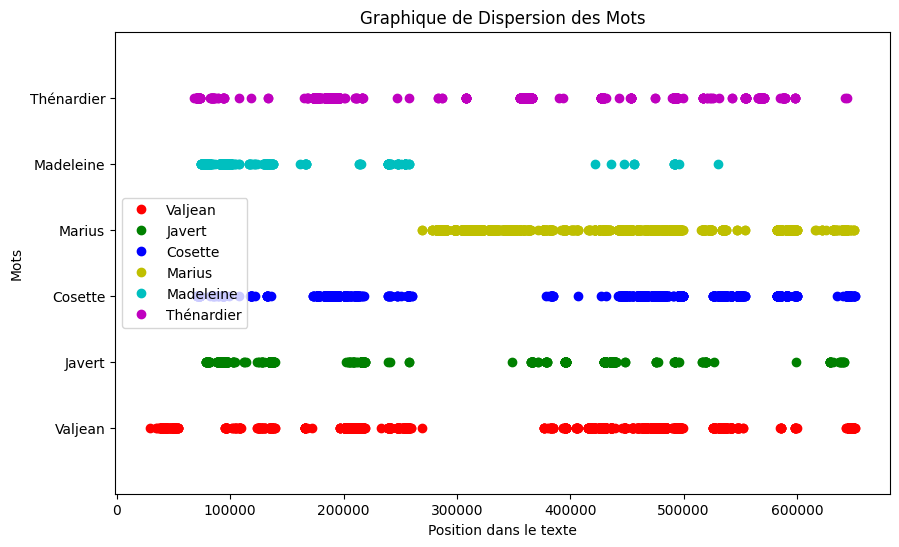

In [67]:
plot_word_dispersion(text=lemmas, words=['Valjean', 'Javert', 'Cosette', 'Marius', 'Madeleine', 'Thénardier'])

Let's try now a basic module to generate word clouds, with `wordcloud`.

In [68]:
!pip install wordcloud

In [69]:
from wordcloud import WordCloud

In [94]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopset,
                min_font_size = 10).generate(" ".join(lemmas))

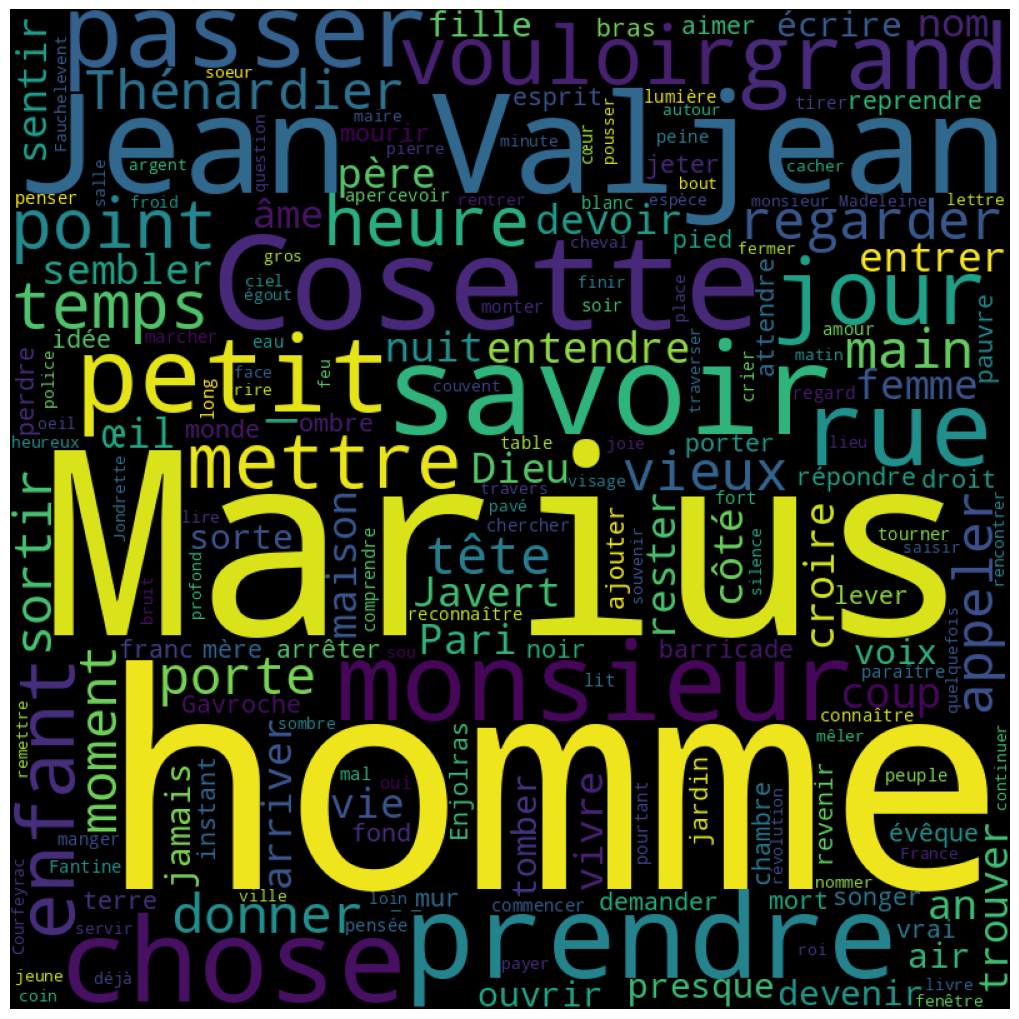

In [95]:
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()